### This notebook compares DESI "magnitudes" with LSSTComCom magnitdues

#### Usual imports

In [1]:
import tables_io
import numpy as np
import matplotlib.pyplot as plt

#### Change this to be the root of the current PZ working area

In [2]:
# pz_dir = '/global/cfs/cdirs/lsst/groups/PZ/DP1'
# if that fails you can use this
# pz_dir = '/global/u2/e/echarles/dx'
pz_dir = '/Users/echarles/pz'

#### Get the data

In [32]:
t = tables_io.read(f'{pz_dir}/sandbox_data/desi/desi_dp1_matches.fits')

In [33]:
t.columns

<TableColumns names=('coord_ra','coord_dec','g_cModelMag','g_cModelMagErr','g_gaap1p0Mag','g_gaap1p0MagErr','g_gaap3p0Mag','g_gaap3p0MagErr','g_kronMag','g_kronMagErr','g_psfMag','g_psfMagErr','g_sersicMag','g_sersicMagErr','r_cModelMag','r_cModelMagErr','r_gaap1p0Mag','r_gaap1p0MagErr','r_gaap3p0Mag','r_gaap3p0MagErr','r_kronMag','r_kronMagErr','r_psfMag','r_psfMagErr','r_sersicMag','r_sersicMagErr','i_cModelMag','i_cModelMagErr','i_gaap1p0Mag','i_gaap1p0MagErr','i_gaap3p0Mag','i_gaap3p0MagErr','i_kronMag','i_kronMagErr','i_psfMag','i_psfMagErr','i_sersicMag','i_sersicMagErr','z_cModelMag','z_cModelMagErr','z_gaap1p0Mag','z_gaap1p0MagErr','z_gaap3p0Mag','z_gaap3p0MagErr','z_kronMag','z_kronMagErr','z_psfMag','z_psfMagErr','z_sersicMag','z_sersicMagErr','DESI_SEP_ARCSEC','g_DESI','r_DESI','i_DESI','z_DESI','zred_DESI','TARGETID','DELTACHI2','DESINAME','DESI_RA','DESI_DEC')>

In [ ]:
#### Scatter plot of i magntidue v. redshift

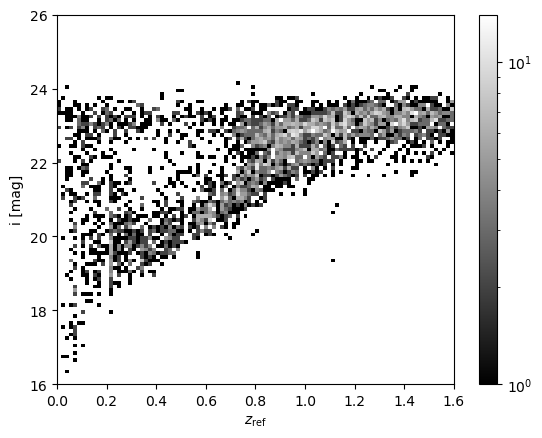

In [35]:
_ = plt.hist2d(t['zred_DESI'], t['i_psfMag'],  bins=(np.linspace(0, 1.6, 101), np.linspace(16, 26, 101)), cmap='gray', norm='log')
_ = plt.colorbar()
_ = plt.xlabel(r'$z_{\rm ref}$')
_ = plt.ylabel('i [mag]')
               

#### Useful function to compute colors

In [36]:
def make_colors(table, bands, band_template):
    colors = {}
    for i, band_ in enumerate(bands[0:-1]):
        col_a = band_template.format(band=band_)
        col_b = band_template.format(band=bands[i+1])
        colors[f"{band_}-{bands[i+1]}"] = table[col_a] - table[col_b]
    return colors

#### Get various set of colors for the different flux measures

In [37]:
colors_desi = make_colors(t, 'griz', '{band}_DESI')
colors_psf = make_colors(t, 'griz', '{band}_psfMag')
colors_cmodel = make_colors(t, 'griz', '{band}_cModelMag')
colors_1p0 = make_colors(t, 'griz', '{band}_gaap1p0Mag')
colors_3p0 = make_colors(t, 'griz', '{band}_gaap3p0Mag')
colors_sersic = make_colors(t, 'griz', '{band}_sersicMag')
redshifts = t['zred_DESI']

#### Desi v. Sersic r-i colors

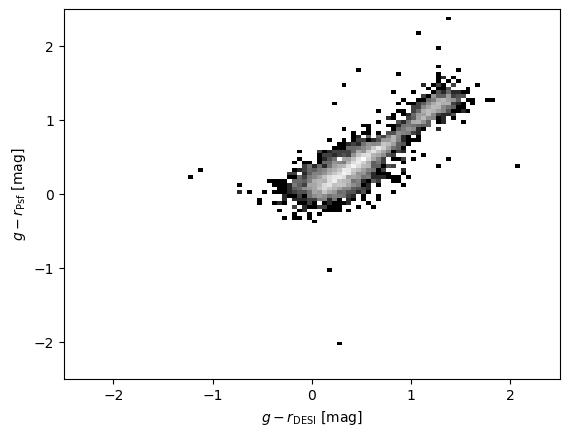

In [8]:
_ = plt.hist2d(colors_desi['r-i'], colors_sersic['r-i'], bins=(np.linspace(-2.5, 2.5, 101), np.linspace(-2.5, 2.5, 101)), cmap='gray', norm='log')
_ = plt.plot([-2.5,-2.5],[2.5,2.5])
_ = plt.ylabel(r'$g-r_{\rm Psf}$ [mag]')
_ = plt.xlabel(r'$g-r_{\rm DESI}$ [mag]')

#### Differences between 3p0  and PSF colors vs. PSF colors (r-i and g-r)

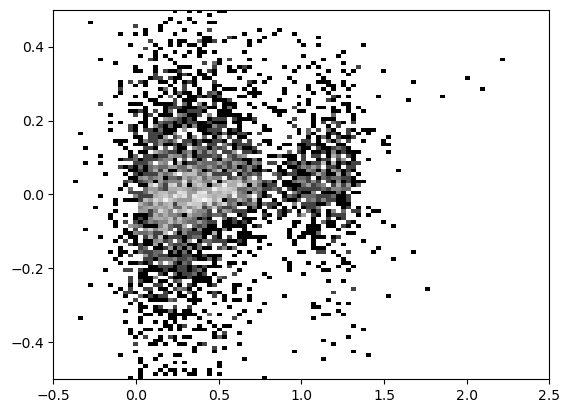

In [9]:
_ = plt.hist2d(colors_psf['r-i'], colors_psf['r-i']-colors_3p0['r-i'], bins=(np.linspace(-0.5, 2.5, 101), np.linspace(-0.5, 0.5, 101)), cmap='gray', norm='log')


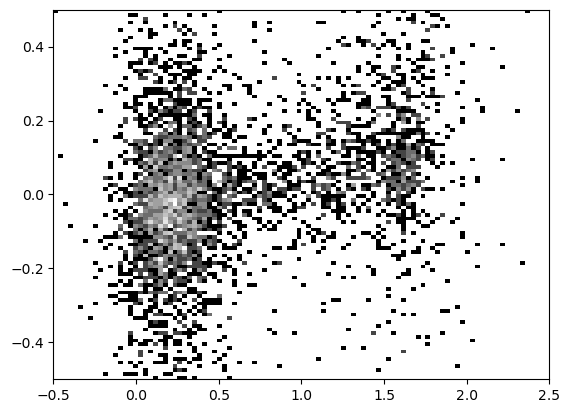

In [10]:
_ = plt.hist2d(colors_psf['g-r'], colors_psf['g-r']-colors_3p0['g-r'], bins=(np.linspace(-0.5, 2.5, 101), np.linspace(-0.5, 0.5, 101)), cmap='gray', norm='log')


#### Histograms of the color differences

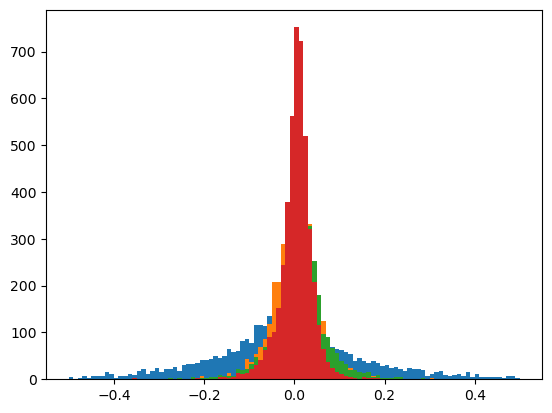

In [11]:
_ = plt.hist(colors_3p0['r-i']-colors_psf['r-i'], bins=np.linspace(-0.5, 0.5, 101))
_ = plt.hist(colors_1p0['r-i']-colors_psf['r-i'], bins=np.linspace(-0.5, 0.5, 101))
_ = plt.hist(colors_cmodel['r-i']-colors_psf['r-i'], bins=np.linspace(-0.5, 0.5, 101))
_ = plt.hist(colors_sersic['r-i']-colors_psf['r-i'], bins=np.linspace(-0.5, 0.5, 101))

### PSF v. Sersic colors.  

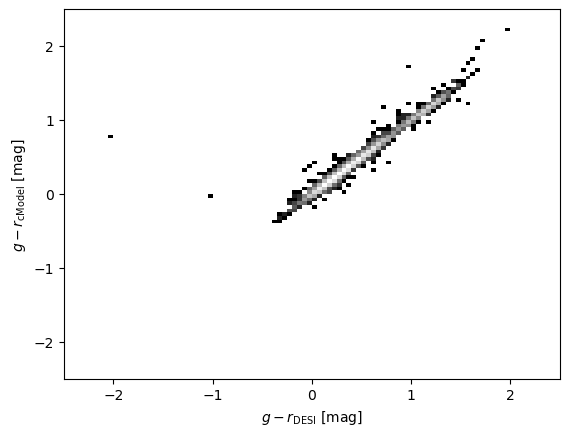

In [12]:
_ = plt.hist2d(colors_sersic['r-i'], colors_psf['r-i'], bins=(np.linspace(-2.5, 2.5, 101), np.linspace(-2.5, 2.5, 101)), cmap='gray', norm='log')
_ = plt.plot([-2.5,-2.5],[2.5,2.5])
_ = plt.ylabel(r'$g-r_{\rm cModel}$ [mag]')
_ = plt.xlabel(r'$g-r_{\rm DESI}$ [mag]')

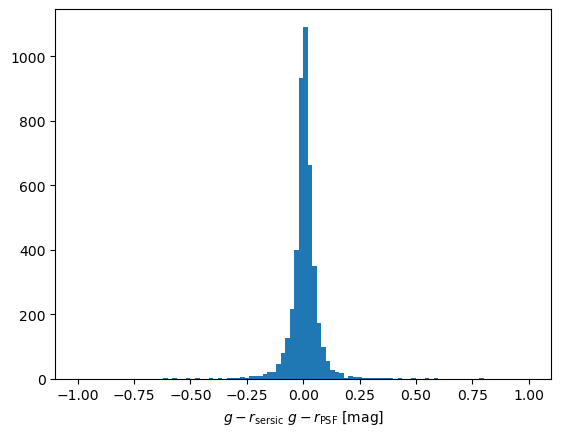

In [13]:
_ = plt.hist(colors_sersic['g-r']-colors_psf['g-r'], bins=(np.linspace(-1.0, 1.0, 101)))
_ = plt.xlabel(r'$g-r_{\rm sersic}$ $g-r_{\rm PSF}$ [mag]')

#### psf v. 3p0 colors

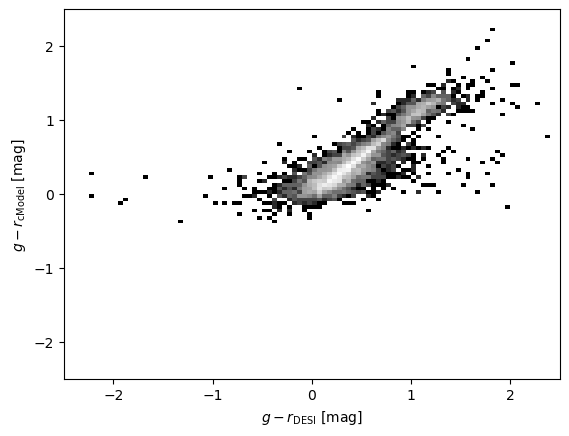

In [14]:
_ = plt.hist2d(colors_3p0['r-i'], colors_psf['r-i'], bins=(np.linspace(-2.5, 2.5, 101), np.linspace(-2.5, 2.5, 101)), cmap='gray', norm='log')
_ = plt.plot([-2.5,-2.5],[2.5,2.5])
_ = plt.ylabel(r'$g-r_{\rm cModel}$ [mag]')
_ = plt.xlabel(r'$g-r_{\rm DESI}$ [mag]')

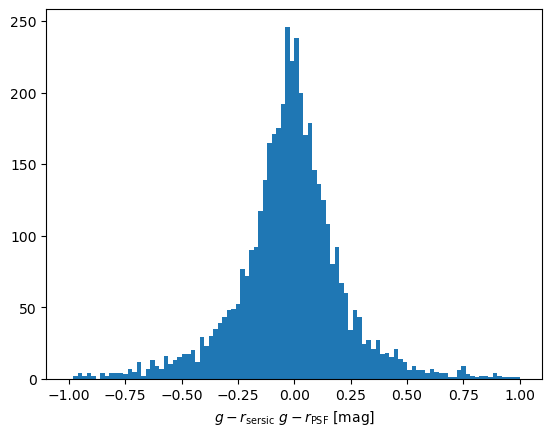

In [15]:
_ = plt.hist(colors_3p0['g-r']-colors_psf['g-r'], bins=(np.linspace(-1.0, 1.0, 101)))
_ = plt.xlabel(r'$g-r_{\rm sersic}$ $g-r_{\rm PSF}$ [mag]')

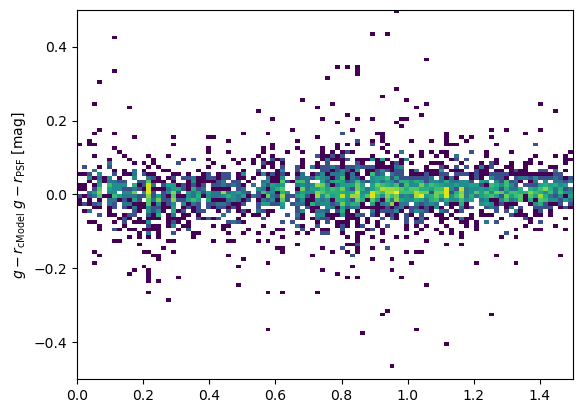

In [16]:
_ = plt.hist2d(t['zred_DESI'], colors_sersic['g-r']-colors_psf['g-r'], bins=(np.linspace(0, 1.5, 101), np.linspace(-0.5, 0.5, 101)), norm='log')
_ = plt.ylabel(r'$g-r_{\rm cModel}$ $g-r_{\rm PSF}$ [mag]')

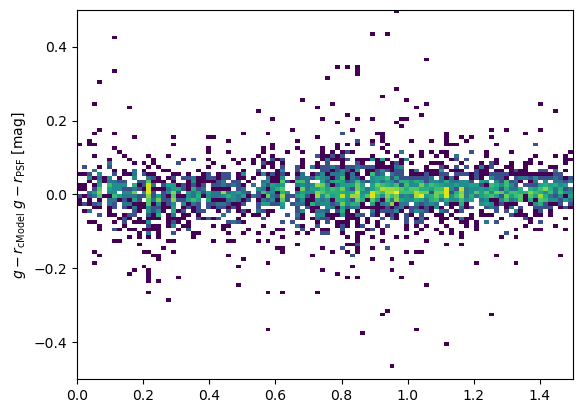

In [17]:
_ = plt.hist2d(t['zred_DESI'], colors_sersic['g-r']-colors_psf['g-r'], bins=(np.linspace(0, 1.5, 101), np.linspace(-0.5, 0.5, 101)), norm='log')
_ = plt.ylabel(r'$g-r_{\rm cModel}$ $g-r_{\rm PSF}$ [mag]')

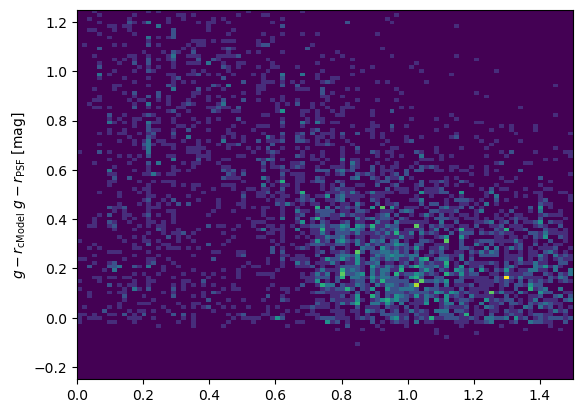

In [18]:
_ = plt.hist2d(t['zred_DESI'], t['g_psfMag']-t['g_cModelMag'], bins=(np.linspace(0, 1.5, 101), np.linspace(-0.25, 1.25, 101)))
_ = plt.ylabel(r'$g-r_{\rm cModel}$ $g-r_{\rm PSF}$ [mag]')

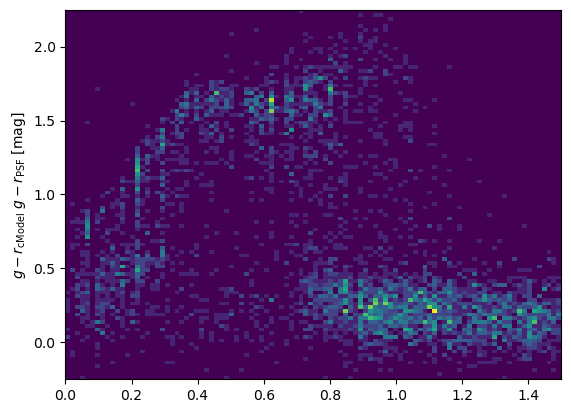

In [19]:
_ = plt.hist2d(t['zred_DESI'], t['g_psfMag']-t['r_psfMag'], bins=(np.linspace(0, 1.5, 101), np.linspace(-0.25, 2.25, 101)))
_ = plt.ylabel(r'$g-r_{\rm cModel}$ $g-r_{\rm PSF}$ [mag]')

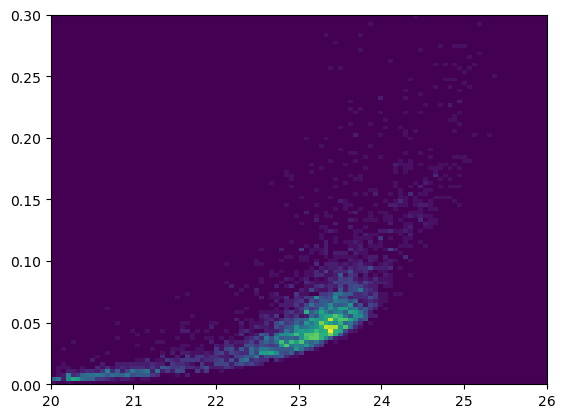

In [20]:
_ = plt.hist2d(t['g_cModelMag'], t['g_cModelMagErr'], bins=(np.linspace(20, 26, 101), np.linspace(0., 0.3, 101)))


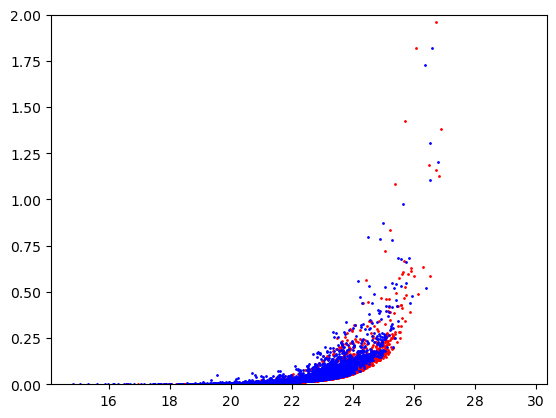

In [21]:
_ = plt.scatter(t['g_psfMag'], t['g_psfMagErr'], color='red', s=1)
_ = plt.scatter(t['g_cModelMag'], t['g_cModelMagErr'], color='blue', s=1)
_ = plt.ylim(0., 2.)

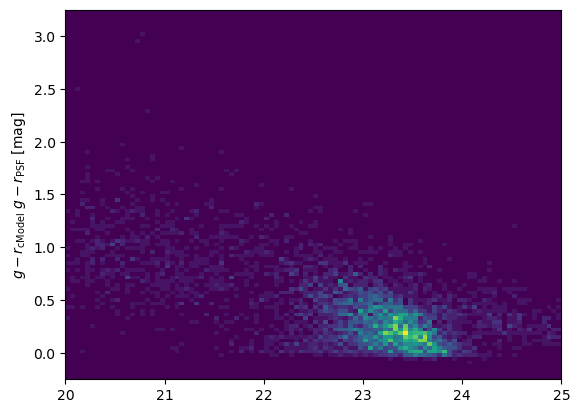

In [22]:
_ = plt.hist2d(t['g_cModelMag'], t['g_psfMag']-t['g_cModelMag'], bins=(np.linspace(20, 25, 101), np.linspace(-0.25, 3.25, 101)))
_ = plt.ylabel(r'$g-r_{\rm cModel}$ $g-r_{\rm PSF}$ [mag]')

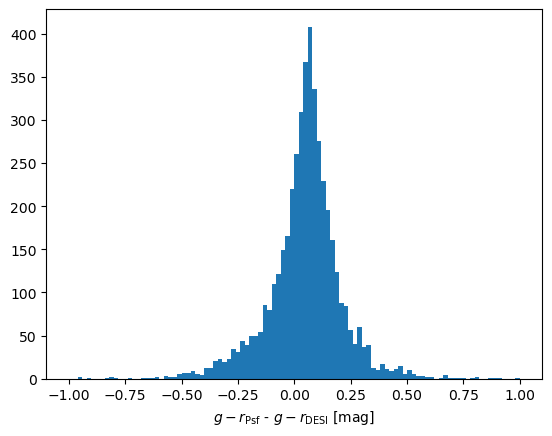

In [23]:
_ = plt.hist(colors_desi['r-i']-colors_psf['r-i'], bins=(np.linspace(-1.0, 1.0, 101)))
_ = plt.xlabel(r'$g-r_{\rm Psf}$ - $g-r_{\rm DESI}$ [mag]')


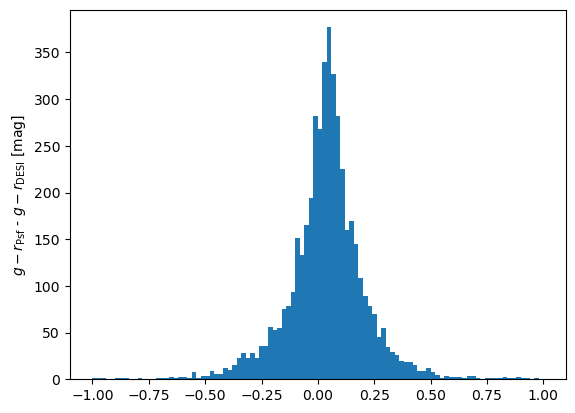

In [24]:
_ = plt.hist(colors_desi['r-i']-colors_cmodel['r-i'], bins=(np.linspace(-1.0, 1.0, 101)))
_ = plt.ylabel(r'$g-r_{\rm Psf}$ - $g-r_{\rm DESI}$ [mag]')


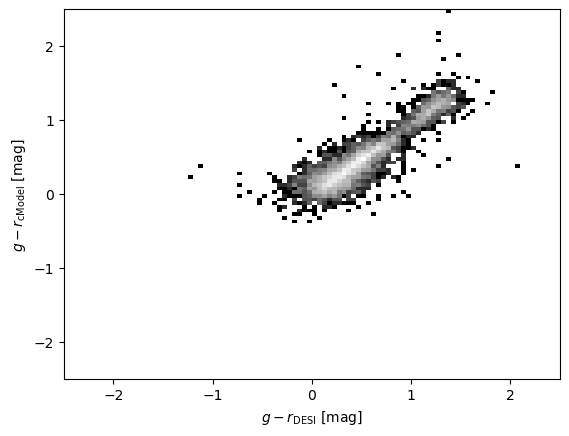

In [25]:
_ = plt.hist2d(colors_desi['r-i'], colors_cmodel['r-i'], bins=(np.linspace(-2.5, 2.5, 101), np.linspace(-2.5, 2.5, 101)), cmap='gray', norm='log')
_ = plt.plot([-2.5,-2.5],[2.5,2.5])
_ = plt.ylabel(r'$g-r_{\rm cModel}$ [mag]')
_ = plt.xlabel(r'$g-r_{\rm DESI}$ [mag]')

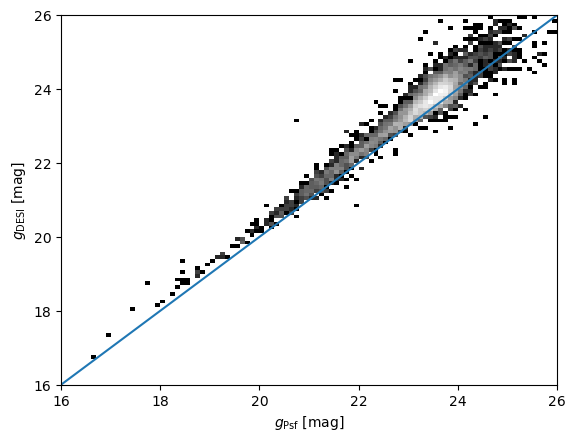

In [26]:
_ = plt.hist2d(t['g_psfMag'], t['g_DESI'], bins=(np.linspace(16, 26, 101), np.linspace(16, 26, 101)), cmap='gray', norm='log')
_ = plt.plot([16,26],[16,26])
_ = plt.xlabel(r'$g_{\rm Psf}$ [mag]')
_ = plt.ylabel(r'$g_{\rm DESI}$ [mag]')

In [27]:
def plot_scatter(t, flux_type, bands):
    fig = plt.figure()
    axes = fig.subplots(2, 2)
    for i, band in enumerate(bands):
        icol = i%2
        irow = int(i/2)
        axs = axes[irow][icol]
        axs.hist2d(t[f"{band}_{flux_type}Mag"], t[f'{band}_DESI'], bins=(np.linspace(16, 26, 101), np.linspace(16, 26, 101)), cmap='gray', norm='log')
        axs.plot([16,26],[16,26])
        axs.set_xlabel(f'{band} {flux_type} [mag]')
        axs.set_ylabel(f'{band} DESI [mag]')
    fig.tight_layout()

In [28]:
def plot_resid(t, flux_type, bands):
    fig = plt.figure()
    axes = fig.subplots(2, 2)
    for i, band in enumerate(bands):
        icol = i%2
        irow = int(i/2)
        axs = axes[irow][icol]
        axs.hist2d(t[f"{band}_{flux_type}Mag"], t[f'{band}_DESI']-t[f"{band}_{flux_type}Mag"], bins=(np.linspace(16, 26, 101), np.linspace(-2, 2, 101)), cmap='gray', norm='log')
        axs.plot([16,26],[16,26])
        axs.set_xlabel(f'{band} {flux_type} [mag]')
        axs.set_ylabel(f'{band} DESI [mag]')
    fig.tight_layout()

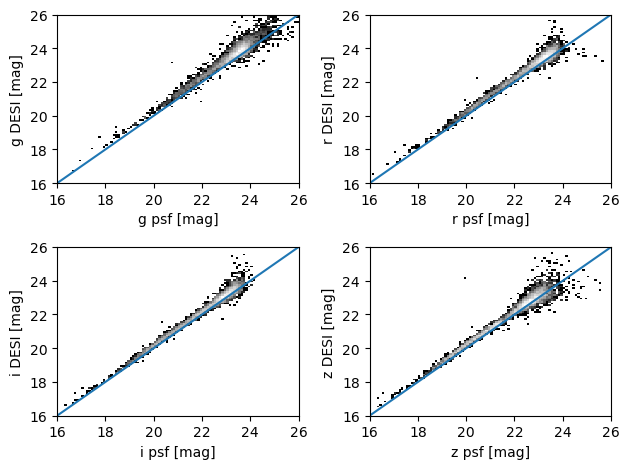

In [29]:
plot_scatter(t, 'psf', 'griz')

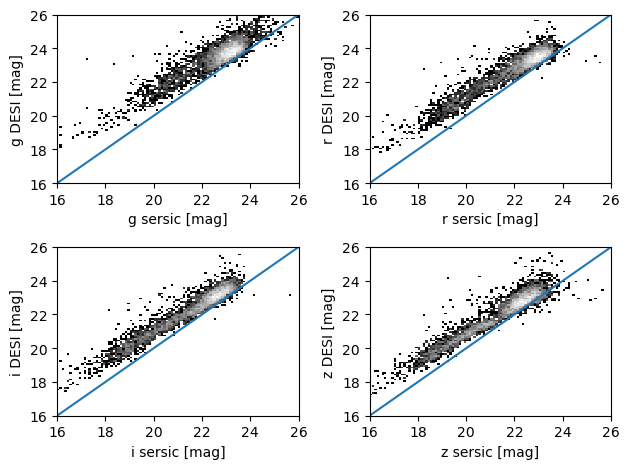

In [30]:
plot_scatter(t, 'sersic', 'griz')

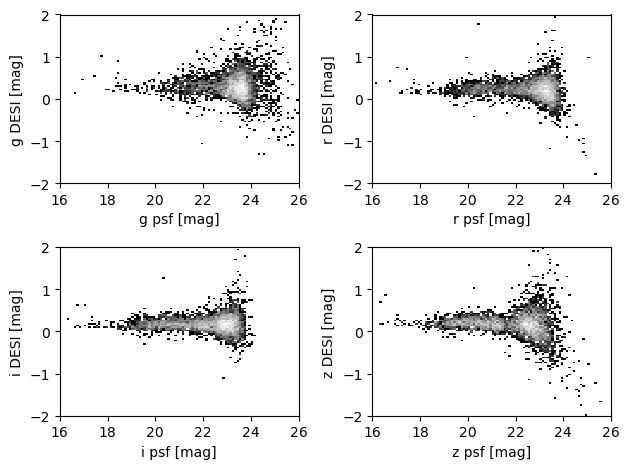

In [31]:
plot_resid(t, 'psf', 'griz')